In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# base data folder
base_dir = "../data"

# get subfolders (100000, 200000, etc.)
folders = [os.path.join(base_dir, f) for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# dict: {lattice_length: {beta: [last_values_across_folders]}}
data = defaultdict(lambda: defaultdict(list))

for folder in folders:
    for file in os.listdir(folder):
        if file.startswith("results_n") and file.endswith(".json"):
            lattice_length = int(file.split("_")[-1].split(".")[0].replace("n", ""))  # extract number after n
            filepath = os.path.join(folder, file)
            with open(filepath, "r") as f:
                results = json.load(f)

            for beta, evolution in results.items():
                last_value = evolution[-1] if len(evolution) > 0 else None
                if last_value is not None:
                    data[lattice_length][float(beta)].append(last_value)


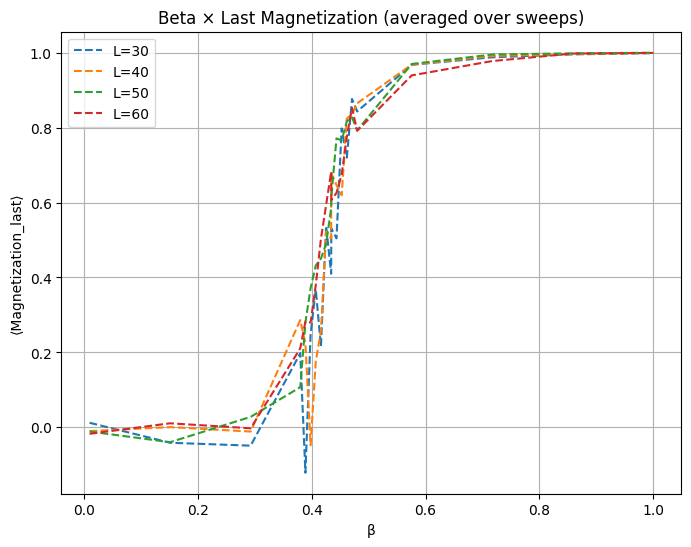

In [2]:
avg_data = {}
for lattice_length, betas in data.items():
    avg_data[lattice_length] = {
        beta: np.mean(values) for beta, values in betas.items()
    }

# plot
plt.figure(figsize=(8,6))
for lattice_length, betas in sorted(avg_data.items()):
    betas_sorted = sorted(betas.items())  # sort by beta
    xs, ys = zip(*betas_sorted)
    plt.plot(xs, ys, linestyle="--", label=f"L={lattice_length}")

plt.xlabel("β")
plt.ylabel("⟨Magnetization_last⟩")
plt.title("Beta × Last Magnetization (averaged over sweeps)")
plt.legend()
plt.grid(True)
plt.show()

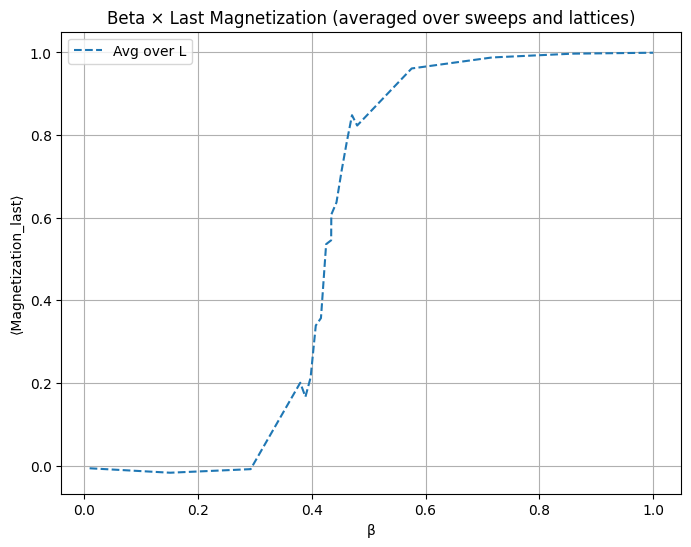

In [3]:
overall_avg = defaultdict(list)
for lattice_length, betas in avg_data.items():
    for beta, val in betas.items():
        overall_avg[beta].append(val)

overall_avg = {beta: np.mean(vals) for beta, vals in overall_avg.items()}

# plot
plt.figure(figsize=(8,6))

# plot average over all lattice sizes
betas_sorted = sorted(overall_avg.items())
xs, ys = zip(*betas_sorted)
plt.plot(xs, ys, linestyle="--", label="Avg over L")

plt.xlabel("β")
plt.ylabel("⟨Magnetization_last⟩")
plt.title("Beta × Last Magnetization (averaged over sweeps and lattices)")
plt.legend()
plt.grid(True)
plt.show()
